1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


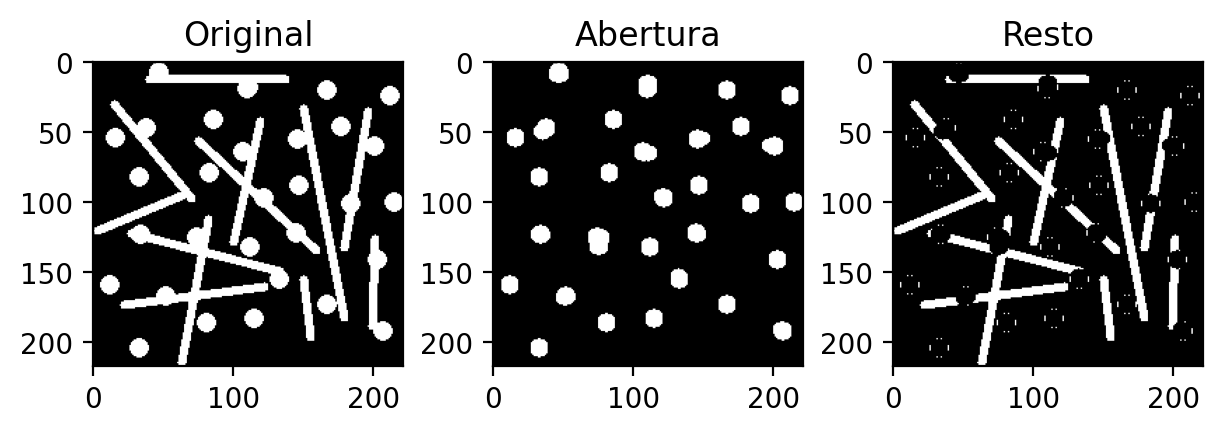

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

raio = 5
bola = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio+1, 2*raio+1), (raio, raio))

img_abertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, bola)
img_resto = img-img_abertura
#img_resto = cv2.morphologyEx(img_resto, cv2.MORPH_OPEN, elemento_estruturante)

fig, axes = plt.subplots(1,3, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Abertura")
axes[1].imshow(img_abertura, cmap='gray', vmin=0, vmax=255)
axes[2].set_title("Resto")
axes[2].imshow(img_resto, cmap='gray', vmin=0, vmax=255)


2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9

b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


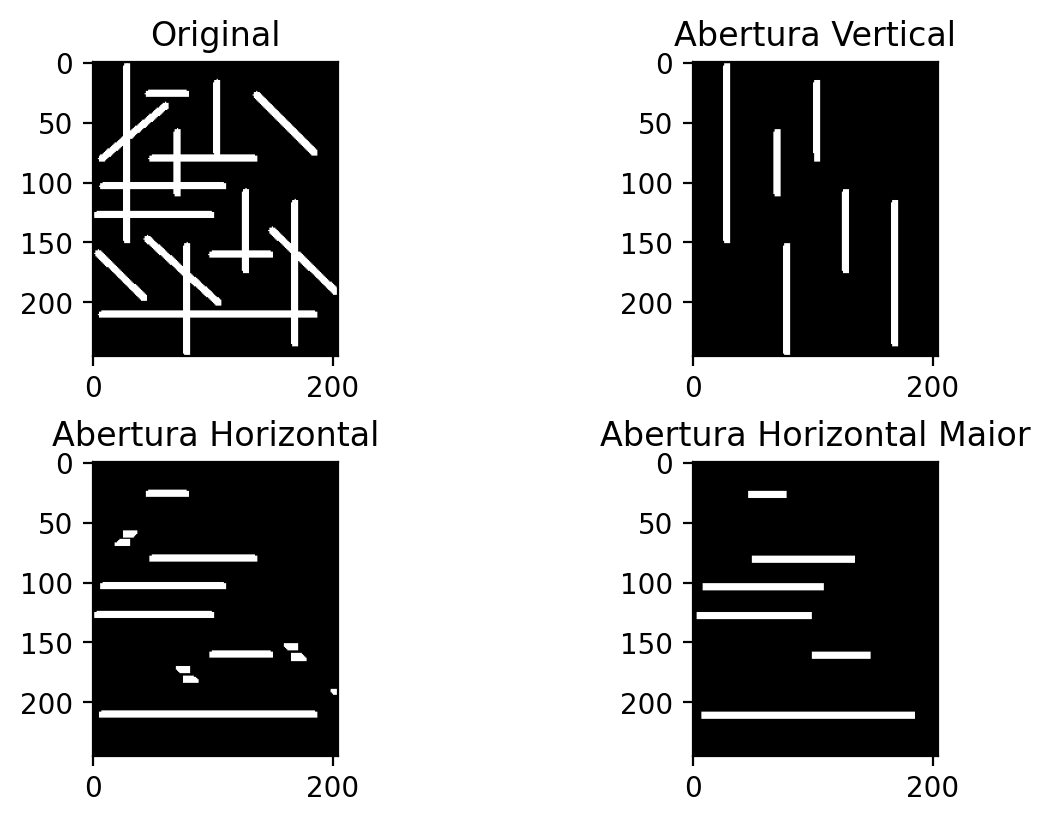

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

barra_v = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 9))
barra_h = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
barra_h2 = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 6))

img_abertura_v = cv2.morphologyEx(img, cv2.MORPH_OPEN, barra_v)
img_abertura_h = cv2.morphologyEx(img, cv2.MORPH_OPEN, barra_h)
img_abertura_h2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, barra_h2)

fig, axes = plt.subplots(2,2, layout="constrained")
axes[0,0].set_title("Original")
axes[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0,1].set_title("Abertura Vertical")
axes[0,1].imshow(img_abertura_v, cmap='gray', vmin=0, vmax=255)
axes[1,0].set_title("Abertura Horizontal")
axes[1,0].imshow(img_abertura_h, cmap='gray', vmin=0, vmax=255)
axes[1,1].set_title("Abertura Horizontal Maior")
axes[1,1].imshow(img_abertura_h2, cmap='gray', vmin=0, vmax=255)

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

'\nNão é possível reter somente os objetos pequenos utilizando a\noperação de abertura, pois essa operação é usada justamente para\neliminar os objetos pequenos da imagem através da erosão,\ndepois é usada dilatação para voltar a imagem a um estado similar\nao original.\n'

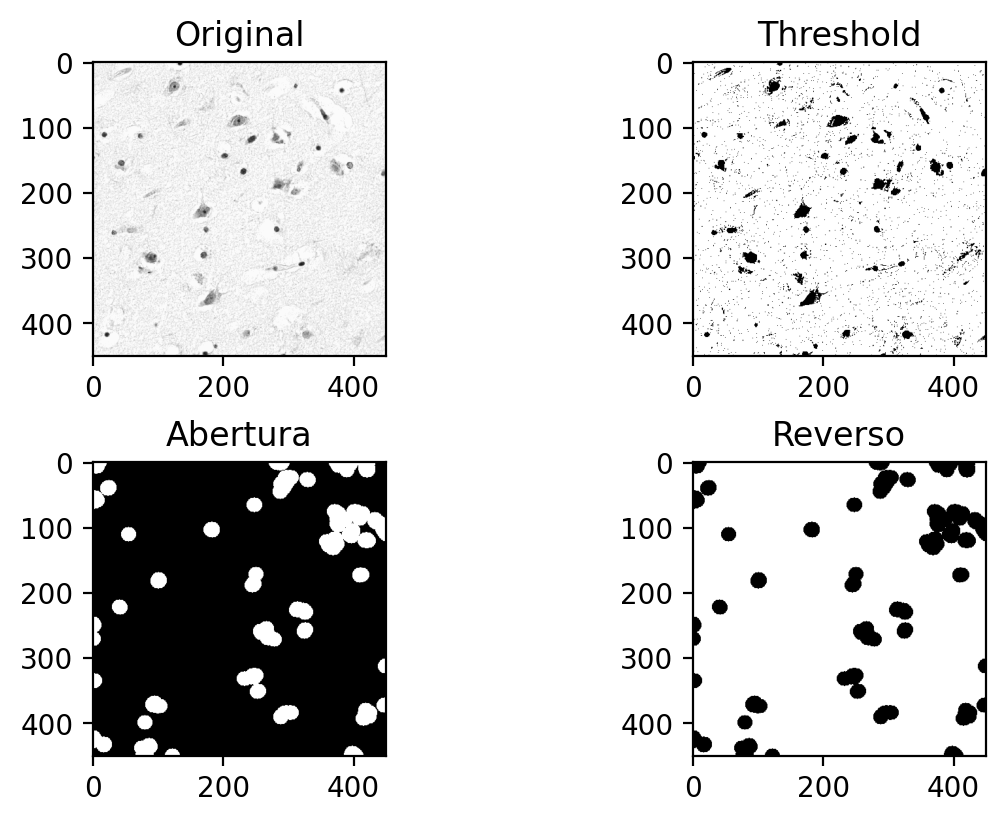

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img_original = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

_, img = cv2.threshold(img_original, 210, 255, cv2.THRESH_BINARY)

raio = 11
bola = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio+1, 2*raio+1), (raio, raio))

img_abertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, bola)
img_inversa = cv2.bitwise_not(img_abertura)

fig, axes = plt.subplots(2,2, layout="constrained")
axes[0,0].set_title("Original")
axes[0,0].imshow(img_original, cmap='gray', vmin=0, vmax=255)
axes[0,1].set_title("Threshold")
axes[0,1].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1,0].set_title("Abertura")
axes[1,0].imshow(img_abertura, cmap='gray', vmin=0, vmax=255)
axes[1,1].set_title("Reverso")
axes[1,1].imshow(img_inversa, cmap='gray', vmin=0, vmax=255)

"""
Não é possível reter somente os objetos pequenos utilizando a
operação de abertura, pois essa operação é usada justamente para
eliminar os objetos pequenos da imagem através da erosão,
depois é usada dilatação para voltar a imagem a um estado similar
ao original.
"""

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

Feijoes:  58


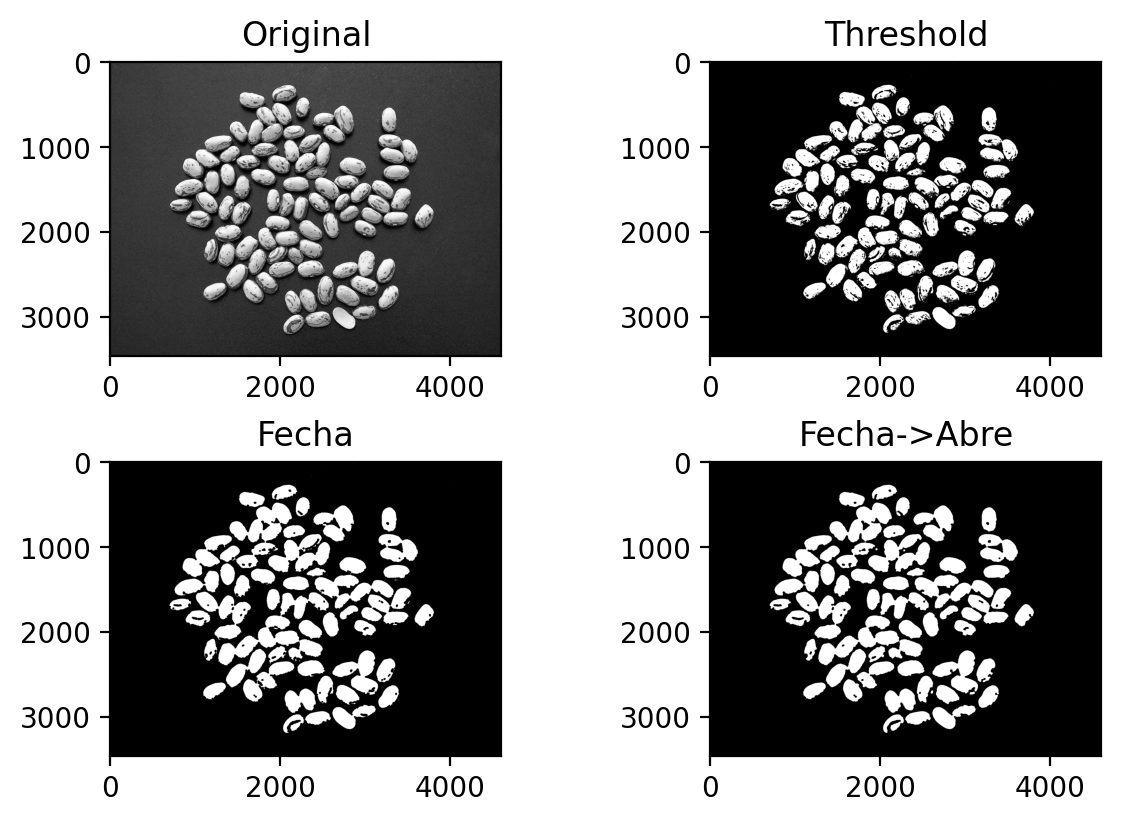

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img_original = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

_, img = cv2.threshold(img_original, 150, 255, cv2.THRESH_BINARY)

raio = 10
bola = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio+1, 2*raio+1), (raio, raio))

img_fecha = cv2.morphologyEx(img, cv2.MORPH_CLOSE, bola)

raio = 10
bola = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio+1, 2*raio+1), (raio, raio))

img_abre_pos_fecha = cv2.morphologyEx(img_fecha, cv2.MORPH_OPEN, bola)

contornos, _ = cv2.findContours(img_abre_pos_fecha, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Feijoes: ", len(contornos))

fig, axes = plt.subplots(2,2, layout="constrained")
axes[0,0].set_title("Original")
axes[0,0].imshow(img_original, cmap='gray', vmin=0, vmax=255)
axes[0,1].set_title("Threshold")
axes[0,1].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1,0].set_title("Fecha")
axes[1,0].imshow(img_fecha, cmap='gray', vmin=0, vmax=255)
axes[1,1].set_title("Fecha->Abre")
axes[1,1].imshow(img_abre_pos_fecha, cmap='gray', vmin=0, vmax=255)

5.  Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

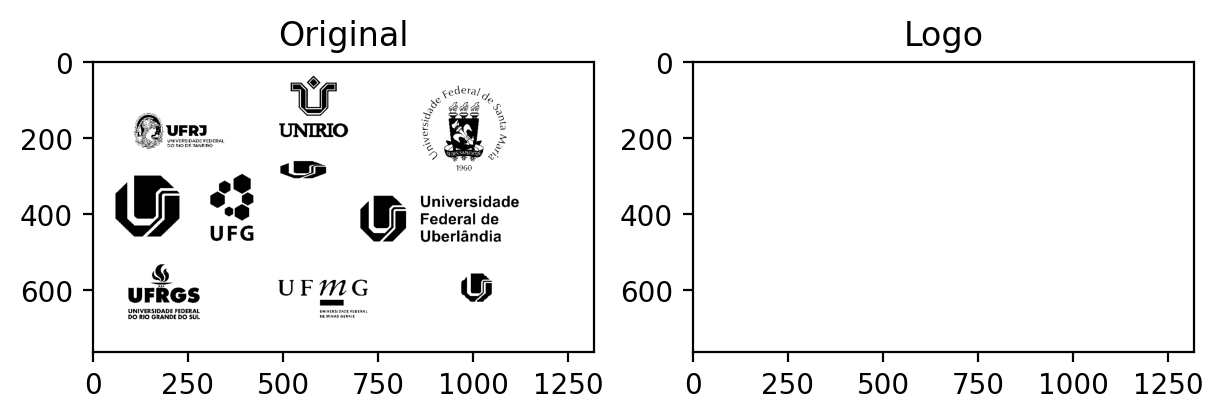

In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img_original = cv2.imread("logotipos.png", cv2.IMREAD_GRAYSCALE)

_, img = cv2.threshold(img_original, 150, 255, cv2.THRESH_BINARY)

logo_ufu = img[295:465,55:230]

#escala = 0.1
#logo_ufu = cv2.resize(logo_ufu, None, fx=escala, fy=escala, interpolation=cv2.INTER_AREA)
#_, logo_ufu = cv2.threshold(logo_ufu, 128, 255, cv2.THRESH_BINARY)

resultado = cv2.morphologyEx(img, cv2.MORPH_HITMISS, logo_ufu)

#contornos, _ = cv2.findContours(resultado, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contornos, -1, (0, 255, 0), 2)

fig, axes = plt.subplots(1,2, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Logo")
axes[1].imshow(resultado, cmap='gray', vmin=0, vmax=255)

6. Utilize operadores morfológicos para extração de fronteiras dos feijões. Mostre o resultado junto com a imagem original

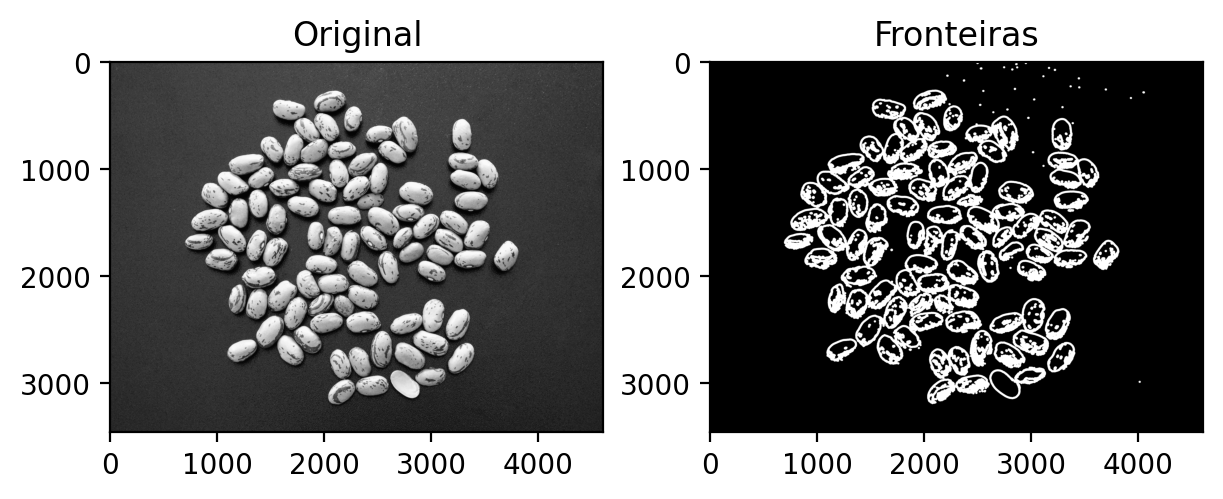

In [61]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img_original = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

_, img = cv2.threshold(img_original, 150, 255, cv2.THRESH_BINARY)

raio = 10
bola = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio+1, 2*raio+1), (raio, raio))

img_fronteiras = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, bola)

fig, axes = plt.subplots(1,2, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img_original, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Fronteiras")
axes[1].imshow(img_fronteiras, cmap='gray', vmin=0, vmax=255)